In [ ]:
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-r9bnis5l
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-r9bnis5l
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-o06qgwrg/pyfolio_33690661be354eb998dbc2063038f805
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-o06qgwrg/pyfolio_33690661be354eb998dbc2063038f805
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-o06qgwrg/elegantrl_bcd0626281d9443eb5a9ea5c63f0c9ac
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-o06qgwrg/elegantrl_bcd0626281d9443eb5a9ea5c63f0c9ac
     |████████████████████████████████| 234 kB 61.0 MB/s 
     |████████████████████████████████| 177 kB 70.6 MB/s 
     |█████████████████████

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/STECH/Reinforcement Learning/datasets

/content/drive/MyDrive/STECH/Reinforcement Learning/datasets


In [ ]:
from finrl import config
from finrl import config_tickers
import os
if not os.path.exists('./' + config.DATA_SAVE_DIR):
  os.makedirs('./' + config.DATA_SAVE_DIR)
if not os.path.exists('./' + config.TRAINED_MODEL_DIR):
  os.makedirs('./' + config.TRAINED_MODEL_DIR)
if not os.path.exists('./' + config.TENSORBOARD_LOG_DIR):
  os.makedirs('./' + config.TENSORBOARD_LOG_DIR)
if not os.path.exists('./' + config.RESULTS_DIR):
  os.makedirs('./' + config.RESULTS_DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.finrl_meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.finrl_meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.finrl_meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.finrl_meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

# import sys
# sys.path.append("../FinRL-Library")

import itertools

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [ ]:
# %cd datasets
# #FX_IDC_USDGBP
# !gdown --id 1rgtkD35D_XxwFoovGLFom3_ojRvPFyeI
# #FX_IDC_USDAUD 1DAY
# !gdown --id 149sQHIF-il4iip76x7UhrLP88o16JYRg
# #FX_USDCAD  1DAY
# !gdown --id 1FFTzUMR9-1umCQlH3bp453SHXZFSWzCp
# #FX_USDCHF
# !gdown --id 1nD4iVk-A0PAFEjJ_ziMHRRTngHKMZt-K
# #FX_EURUSD, 1D
# !gdown --id 15GiISZwR8EM9SsLVd_gobQIDTikpZZcQ  
# #FX_USDJPY, 1D
# !gdown --id 1_F0go2NXmTfMx-YXuQFEY2kGq0sCAlHG
# #FX_EURAUD, 1D
# !gdown --id 1dFAbrS9KQLzse591GvFQZsYSSvQqgmNy

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_csv('FX_EURAUD, 1D.csv')
df2 = pd.read_csv('FX_IDC_USDAUD, 1D.csv')
df3 = pd.read_csv('FX_IDC_USDGBP, 1D (1).csv')
df4 = pd.read_csv('FX_USDCAD, 1D.csv')
df5 = pd.read_csv('FX_USDCHF, 1D.csv')
df6 = pd.read_csv('FX_USDJPY, 1D.csv')

In [ ]:
df1.head()

,time,open,high,low,close,MA,Smoothing Line,EMA,Smoothing Line.1,DEMA,Volume,Volume MA
0,1993-05-09T21:00:00Z,1.75272,1.77199,1.75272,1.76307,NaN,NaN,NaN,NaN,NaN,0,NaN
1,1993-05-10T21:00:00Z,1.76307,1.77368,1.75904,1.75904,NaN,NaN,NaN,NaN,NaN,0,NaN
2,1993-05-11T21:00:00Z,1.75904,1.76988,1.74380,1.74380,NaN,NaN,NaN,NaN,NaN,0,NaN
3,1993-05-12T21:00:00Z,1.74380,1.75541,1.73909,1.75541,NaN,NaN,NaN,NaN,NaN,0,NaN
4,1993-05-13T21:00:00Z,1.75541,1.76368,1.74637,1.74637,NaN,NaN,NaN,NaN,NaN,0,NaN


In [ ]:
def transformdata2 (df, ticname):
  df['time'] = pd.to_datetime(df['time'])
  df = df.rename(columns={'time':'date', 'Volume':'volume'})
  df['day'] = df['date'].dt.dayofweek
  df['date'] = df['date'].dt.date
  df['tic'] = ticname
  df = df[['date', 'open', 'high','low','close', 'volume','tic','day']]
  return df

In [ ]:
df1trans = transformdata2 (df1, 'EURAUD')
df2trans = transformdata2 (df2, 'USDAUD')
df3trans = transformdata2 (df3, 'USDGBP')
df4trans = transformdata2 (df4, 'USDCAD')
df5trans = transformdata2 (df5, 'USDCHF')
df6trans = transformdata2 (df6, 'USDJPY')

In [ ]:
df = pd.concat([df1trans
                , df2trans
                , df3trans, df4trans, df5trans, df6trans
                ])

In [ ]:
def preprocessing_data(df, n_tics = 5):
  df = df[df.groupby('date').date.transform('count')>n_tics].copy() 
  df = df.reset_index()
  df = df.replace([np.inf, -np.inf], 0)
  return df

In [ ]:
df = preprocessing_data(df)
print(df)

       index        date       open       high        low      close   volume  \
0          1  1993-05-10    1.76307    1.77368    1.75904    1.75904        0   
1          2  1993-05-11    1.75904    1.76988    1.74380    1.74380        0   
2          3  1993-05-12    1.74380    1.75541    1.73909    1.75541        0   
3          4  1993-05-13    1.75541    1.76368    1.74637    1.74637        0   
4          6  1993-05-17    1.74041    1.77380    1.74041    1.76738        0   
...      ...         ...        ...        ...        ...        ...      ...   
35713   7534  2022-05-10  130.42900  130.81200  129.44500  129.93900   508428   
35714   7535  2022-05-11  129.93900  130.05400  127.51600  128.26300  1259196   
35715   7536  2022-05-12  128.26300  129.45400  128.24800  129.24500   450358   
35716   7538  2022-05-16  129.11300  129.77900  128.82700  129.35600   335378   
35717   7539  2022-05-17  129.35600  129.53600  128.94100  129.13000   152327   

          tic  day  
0     

In [ ]:
df = df[['date', 'open', 'high','low','close', 'volume','tic','day']]

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35718 entries, 0 to 35717
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    35718 non-null  datetime64[ns]
 1   open    35718 non-null  float64       
 2   high    35718 non-null  float64       
 3   low     35718 non-null  float64       
 4   close   35718 non-null  float64       
 5   volume  35718 non-null  int64         
 6   tic     35718 non-null  object        
 7   day     35718 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 2.5+ MB


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.to_csv('transform.csv',index=False)
df = pd.read_csv('transform.csv')

In [ ]:
df

,date,open,high,low,close,volume,tic,day
0,1993-05-10,1.76307,1.77368,1.75904,1.75904,0,EURAUD,0
1,1993-05-11,1.75904,1.76988,1.74380,1.74380,0,EURAUD,1
2,1993-05-12,1.74380,1.75541,1.73909,1.75541,0,EURAUD,2
3,1993-05-13,1.75541,1.76368,1.74637,1.74637,0,EURAUD,3
4,1993-05-17,1.74041,1.77380,1.74041,1.76738,0,EURAUD,0
...,...,...,...,...,...,...,...,...
35713,2022-05-10,130.42900,130.81200,129.44500,129.93900,508428,USDJPY,1
35714,2022-05-11,129.93900,130.05400,127.51600,128.26300,1259196,USDJPY,2
35715,2022-05-12,128.26300,129.45400,128.24800,129.24500,450358,USDJPY,3
35716,2022-05-16,129.11300,129.77900,128.82700,129.35600,335378,USDJPY,0


In [ ]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = config.INDICATORS,
                    use_vix=True,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

Successfully added technical indicators
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (7309, 8)
Successfully added vix
Successfully added turbulence index


In [ ]:
config.INDICATORS

['macd',
 'boll_ub',
 'boll_lb',
 'rsi_30',
 'cci_30',
 'dx_30',
 'close_30_sma',
 'close_60_sma']

In [ ]:
processed

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,1993-05-10,1.76307,1.77368,1.75904,1.75904,0,EURAUD,0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.759040,1.759040,13.720000,0.000000
1,1993-05-10,1.41110,1.42720,1.41040,1.42370,0,USDAUD,0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.423700,1.423700,13.720000,0.000000
2,1993-05-10,1.26830,1.27110,1.26610,1.27110,0,USDCAD,0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.271100,1.271100,13.720000,0.000000
3,1993-05-10,1.42710,1.46090,1.42650,1.45860,0,USDCHF,0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.458600,1.458600,13.720000,0.000000
4,1993-05-10,0.63840,0.65320,0.63800,0.65130,0,USDGBP,0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,0.651300,0.651300,13.720000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34693,2022-05-16,1.44100,1.45476,1.43234,1.43390,0,USDAUD,0,0.022582,1.470520,1.316685,58.366845,120.064722,19.295117,1.373169,1.376788,27.469999,13.566394
34694,2022-05-16,1.29163,1.29814,1.28362,1.28449,279373,USDCAD,0,0.008995,1.310764,1.243793,53.756782,82.904547,0.330439,1.268975,1.269934,27.469999,13.566394
34695,2022-05-16,1.00131,1.00643,1.00072,1.00176,148198,USDCHF,0,0.017009,1.013379,0.923431,73.113053,142.765555,73.491745,0.955353,0.940382,27.469999,13.566394
34696,2022-05-16,0.81549,0.81848,0.81113,0.81160,0,USDGBP,0,0.013895,0.831083,0.750746,66.969186,115.218993,47.222252,0.781715,0.764825,27.469999,13.566394


In [ ]:
list_ticker = processed['tic'].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(), processed['date'].max()).astype(str))
combination = list(itertools.product(list_date, list_ticker))

In [ ]:
combination

In [ ]:
processed_full = pd.DataFrame(combination, columns=['date','tic']).merge(processed, on=['date','tic'],how='left')

In [ ]:
processed_full

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,1993-05-10,EURAUD,1.76307,1.77368,1.75904,1.75904,0.0,0.0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.759040,1.759040,13.720000,0.000000
1,1993-05-10,USDAUD,1.41110,1.42720,1.41040,1.42370,0.0,0.0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.423700,1.423700,13.720000,0.000000
2,1993-05-10,USDCAD,1.26830,1.27110,1.26610,1.27110,0.0,0.0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.271100,1.271100,13.720000,0.000000
3,1993-05-10,USDCHF,1.42710,1.46090,1.42650,1.45860,0.0,0.0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.458600,1.458600,13.720000,0.000000
4,1993-05-10,USDGBP,0.63840,0.65320,0.63800,0.65130,0.0,0.0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,0.651300,0.651300,13.720000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63589,2022-05-16,USDAUD,1.44100,1.45476,1.43234,1.43390,0.0,0.0,0.022582,1.470520,1.316685,58.366845,120.064722,19.295117,1.373169,1.376788,27.469999,13.566394
63590,2022-05-16,USDCAD,1.29163,1.29814,1.28362,1.28449,279373.0,0.0,0.008995,1.310764,1.243793,53.756782,82.904547,0.330439,1.268975,1.269934,27.469999,13.566394
63591,2022-05-16,USDCHF,1.00131,1.00643,1.00072,1.00176,148198.0,0.0,0.017009,1.013379,0.923431,73.113053,142.765555,73.491745,0.955353,0.940382,27.469999,13.566394
63592,2022-05-16,USDGBP,0.81549,0.81848,0.81113,0.81160,0.0,0.0,0.013895,0.831083,0.750746,66.969186,115.218993,47.222252,0.781715,0.764825,27.469999,13.566394


In [ ]:
processed_full = processed_full[processed_full['date'].isin(processed['date'])]

In [ ]:
processed_full = processed_full.sort_values(['date','tic'])

In [ ]:
processed_full

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,1993-05-10,EURAUD,1.76307,1.77368,1.75904,1.75904,0.0,0.0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.759040,1.759040,13.720000,0.000000
1,1993-05-10,USDAUD,1.41110,1.42720,1.41040,1.42370,0.0,0.0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.423700,1.423700,13.720000,0.000000
2,1993-05-10,USDCAD,1.26830,1.27110,1.26610,1.27110,0.0,0.0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.271100,1.271100,13.720000,0.000000
3,1993-05-10,USDCHF,1.42710,1.46090,1.42650,1.45860,0.0,0.0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,1.458600,1.458600,13.720000,0.000000
4,1993-05-10,USDGBP,0.63840,0.65320,0.63800,0.65130,0.0,0.0,0.000000,1.772973,1.729867,0.000000,-66.666667,100.000000,0.651300,0.651300,13.720000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63589,2022-05-16,USDAUD,1.44100,1.45476,1.43234,1.43390,0.0,0.0,0.022582,1.470520,1.316685,58.366845,120.064722,19.295117,1.373169,1.376788,27.469999,13.566394
63590,2022-05-16,USDCAD,1.29163,1.29814,1.28362,1.28449,279373.0,0.0,0.008995,1.310764,1.243793,53.756782,82.904547,0.330439,1.268975,1.269934,27.469999,13.566394
63591,2022-05-16,USDCHF,1.00131,1.00643,1.00072,1.00176,148198.0,0.0,0.017009,1.013379,0.923431,73.113053,142.765555,73.491745,0.955353,0.940382,27.469999,13.566394
63592,2022-05-16,USDGBP,0.81549,0.81848,0.81113,0.81160,0.0,0.0,0.013895,0.831083,0.750746,66.969186,115.218993,47.222252,0.781715,0.764825,27.469999,13.566394


In [ ]:
train = data_split(processed_full, '2009-01-01','2020-07-01')
trade = data_split(processed_full, '2020-07-01','2021-10-31')
print(len(train))
print(len(trade))

13782
1614


In [ ]:
stock_dimension = len(train.tic.unique())
stock_dimension

6

In [ ]:
state_space = 1 + 2*stock_dimension + len(config.INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 6, State Space: 61


In [ ]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

In [ ]:
env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": config.INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

In [ ]:
e_train_gym = StockTradingEnv(df=train, **env_kwargs)

In [ ]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [ ]:
agent = DRLAgent(env=env_train)

In [ ]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model('a2c')

{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cuda device


In [ ]:
trained_a2c = agent.train_model(model=model_a2c,
                                tb_log_name='a2c',
                                total_timesteps=100000)

In [ ]:
A2C_path = os.path.join('Training','Saved Models','A2C')

In [ ]:
trained_a2c.save(A2C_path)

In [ ]:
data_risk_indicator = processed_full[(processed_full.date<'2020-07-01') & (processed_full.date>='2009-01-01')]
data_risk_indicator

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
34314,2009-01-05,EURAUD,1.89946,1.91203,1.86031,1.87106,89297.0,0.0,0.010592,2.088158,1.897012,46.757688,-170.882905,14.688647,1.979489,1.932810,39.080002,63.553099
34315,2009-01-05,USDAUD,1.40540,1.41550,1.39100,1.39340,0.0,0.0,-0.016975,1.590984,1.395756,47.729879,-184.430412,28.074973,1.508577,1.448412,39.080002,63.553099
34316,2009-01-05,USDCAD,1.21502,1.22250,1.18655,1.18878,25414.0,0.0,-0.001479,1.277509,1.183326,50.195166,-104.073906,11.516459,1.229768,1.184100,39.080002,63.553099
34317,2009-01-05,USDCHF,1.08283,1.11250,1.07000,1.10876,59387.0,0.0,-0.026298,1.267767,1.036746,45.818053,-107.233409,29.238616,1.166553,1.148714,39.080002,63.553099
34318,2009-01-05,USDGBP,0.68720,0.69280,0.67880,0.68080,0.0,0.0,0.011445,0.699293,0.636827,60.524200,104.709148,16.277189,0.665813,0.624093,39.080002,63.553099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59479,2020-06-30,USDAUD,1.45590,1.46330,1.44704,1.44847,0.0,1.0,-0.018731,1.498213,1.410920,41.807377,-49.914515,20.192722,1.480309,1.542418,30.430000,2.793025
59480,2020-06-30,USDCAD,1.36579,1.36995,1.35698,1.35740,296971.0,1.0,-0.006230,1.376453,1.336339,46.135912,-31.909477,6.013050,1.369997,1.390824,30.430000,2.793025
59481,2020-06-30,USDCHF,0.95115,0.95330,0.94613,0.94721,177014.0,1.0,-0.004764,0.967079,0.938464,43.216031,-73.022291,32.384453,0.958553,0.964626,30.430000,2.793025
59482,2020-06-30,USDGBP,0.81301,0.81568,0.80637,0.80638,0.0,1.0,0.000134,0.816995,0.781480,51.747770,29.967982,21.526110,0.804946,0.809776,30.430000,2.793025


In [ ]:
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [ ]:
insample_risk_indicator.vix.describe()

count    2297.000000
mean       18.878755
std         8.522991
min         9.150000
25%        13.370000
50%        16.209999
75%        21.299999
max        82.690002
Name: vix, dtype: float64

In [ ]:
e_trade_gym = StockTradingEnv(df = trade, 
                              turbulence_threshold=70,
                              risk_indicator_col='vix',**env_kwargs)

In [ ]:
df_account_value, df_actions = DRLAgent.DRL_prediction(
    model=trained_a2c,
    environment=e_trade_gym
)

hit end!


In [ ]:
df_account_value.shape

(269, 2)

In [ ]:
df_account_value.tail()

,date,account_value
264,2021-10-21,1.071786e+06
265,2021-10-25,1.077876e+06
266,2021-10-26,1.074977e+06
267,2021-10-27,1.072567e+06
268,2021-10-28,1.076357e+06


In [ ]:
cd /content/drive/MyDrive/STECH/Reinforcement Learning

/content/drive/MyDrive/STECH/Reinforcement Learning


In [ ]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')
perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all

==============Get Backtest Results===========
Annual return          0.071363
Cumulative returns     0.076357
Annual volatility      0.051980
Sharpe ratio           1.357120
Calmar ratio           2.533467
Stability              0.715746
Max drawdown          -0.028168
Omega ratio            1.262644
Sortino ratio          2.145040
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.093590
Daily value at risk   -0.006269
dtype: float64


Annual return          0.071363
Cumulative returns     0.076357
Annual volatility      0.051980
Sharpe ratio           1.357120
Calmar ratio           2.533467
Stability              0.715746
Max drawdown          -0.028168
Omega ratio            1.262644
Sortino ratio          2.145040
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.093590
Daily value at risk   -0.006269
dtype: float64

In [ ]:
perf_stats_all = pd.DataFrame(perf_stats_all)

In [ ]:
config.RESULTS_DIR

'results'

In [ ]:
perf_stats_all.to_csv('./'+config.RESULTS_DIR+"/perf_stats_all "+now+'.csv')

In [ ]:
df_account_value

,date,account_value
0,2020-07-01,1.000000e+06
1,2020-07-02,9.999878e+05
2,2020-07-06,9.999802e+05
3,2020-07-07,9.998946e+05
4,2020-07-08,9.998542e+05
...,...,...
264,2021-10-21,1.071786e+06
265,2021-10-25,1.077876e+06
266,2021-10-26,1.074977e+06
267,2021-10-27,1.072567e+06


In [ ]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')


==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (335, 8)
Annual return          0.273520
Cumulative returns     0.379084
Annual volatility      0.139248
Sharpe ratio           1.811893
Calmar ratio           3.062662
Stability              0.918651
Max drawdown          -0.089308
Omega ratio            1.351851
Sortino ratio          2.684720
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.051856
Daily value at risk   -0.016542
dtype: float64


**BackTestPlot**

In [ ]:
df_account_value

,date,account_value
0,2020-07-01,1.000000e+06
1,2020-07-02,9.999878e+05
2,2020-07-06,9.999802e+05
3,2020-07-07,9.998946e+05
4,2020-07-08,9.998542e+05
...,...,...
264,2021-10-21,1.071786e+06
265,2021-10-25,1.077876e+06
266,2021-10-26,1.074977e+06
267,2021-10-27,1.072567e+06


==============Compare to DJIA===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (335, 8)


Start date,2020-07-01
End date,2021-10-28
Total months,12
,Backtest
Annual return,7.136%
Cumulative returns,7.636%
Annual volatility,5.198%
Sharpe ratio,1.36
Calmar ratio,2.53
Stability,0.72
Max drawdown,-2.817%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,2.82,2020-08-12,2021-01-04,2021-02-16,135
1,2.51,2021-03-30,2021-04-22,2021-06-22,61
2,2.15,2021-06-30,2021-08-02,2021-09-27,64
3,0.77,2021-10-18,2021-10-21,NaT,NaN
4,0.77,2021-09-28,2021-09-30,2021-10-07,8


Stress Events,mean,min,max
New Normal,0.03%,-0.81%,1.42%


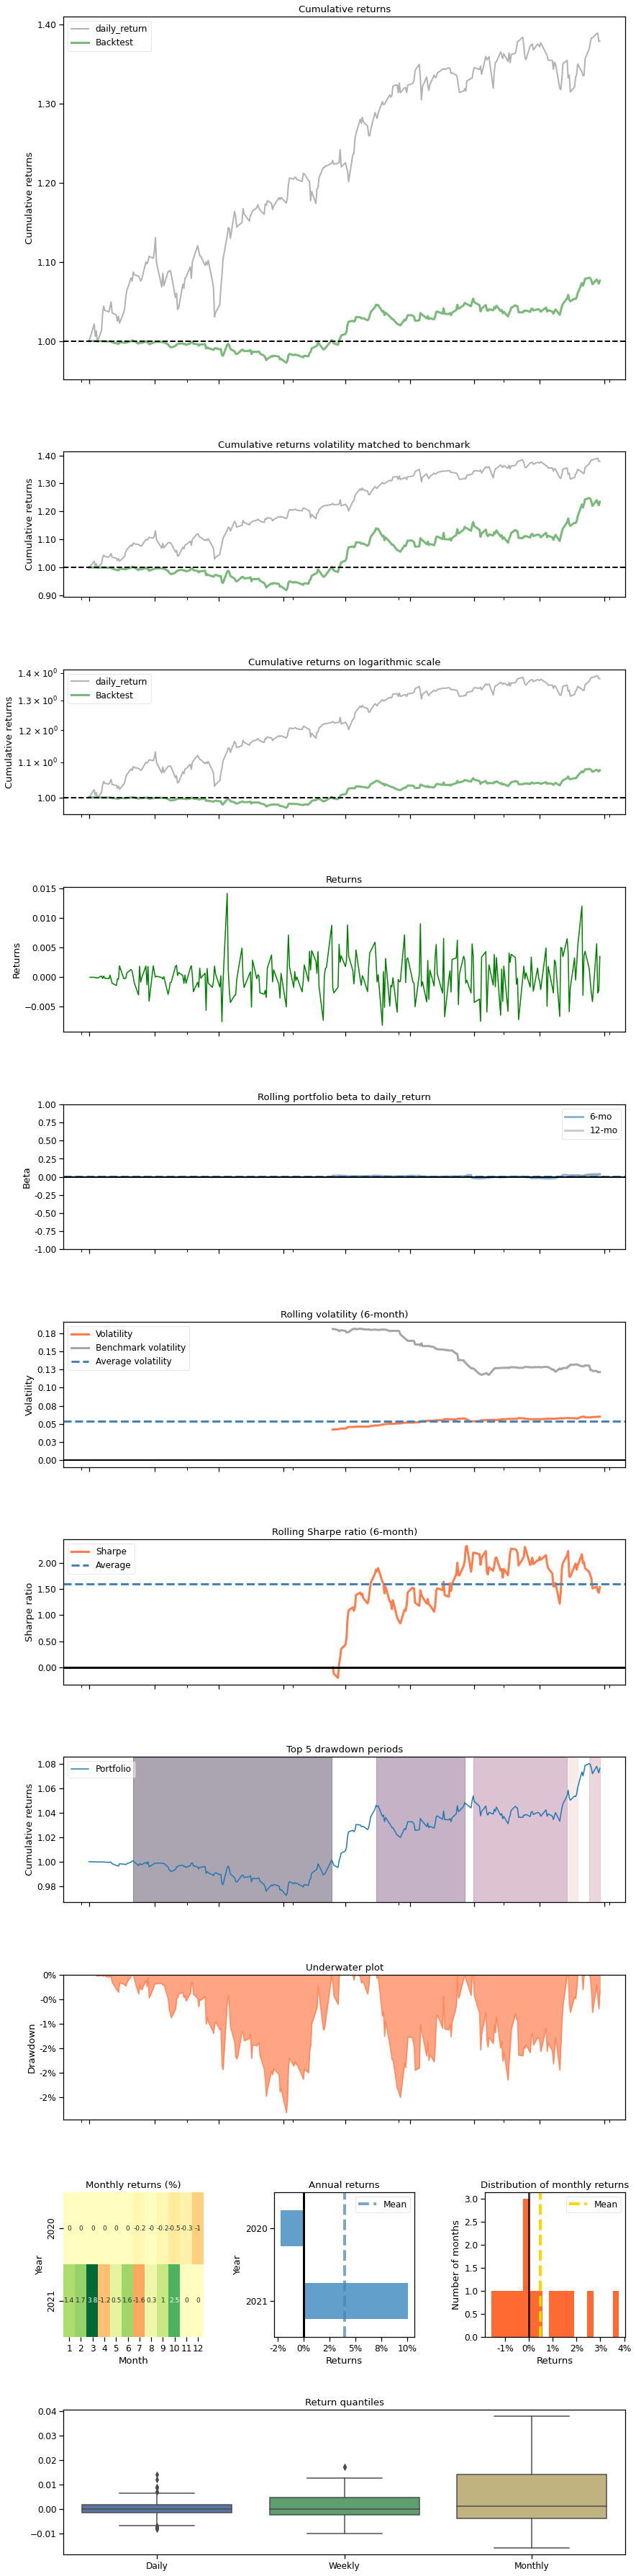

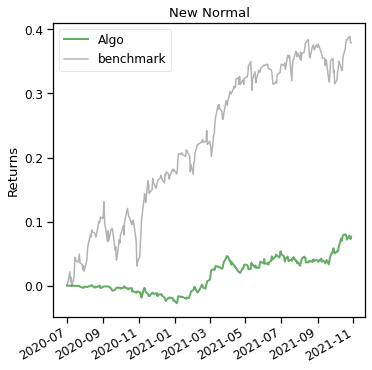

In [ ]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value, 
             baseline_ticker = '^DJI', 
             baseline_start = df_account_value.loc[0,'date'],
             baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])